In [71]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data from CSV File

In [72]:
df = pd.read_csv('dataset.csv', usecols=list(range(1, 23)), na_values = "ND", \
                 index_col = 0, parse_dates = True)
print(df.shape)
df.head()

(5217, 21)


,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,...,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,...,6.126,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,...,6.085,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,...,6.070,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,...,6.080,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,...,6.057,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85


### Shorten Column Names for Better Readability

In [73]:
df.columns = [x.split("-")[0].strip() for x in df.columns]
df.columns

Index(['AUSTRALIA', 'EURO AREA', 'NEW ZEALAND', 'UNITED KINGDOM', 'BRAZIL',
       'CANADA', 'CHINA', 'HONG KONG', 'INDIA', 'KOREA', 'MEXICO',
       'SOUTH AFRICA', 'SINGAPORE', 'DENMARK', 'JAPAN', 'MALAYSIA', 'NORWAY',
       'SWEDEN', 'SRI LANKA', 'SWITZERLAND', 'TAIWAN'],
      dtype='object')

### Check for Null Values

In [74]:
df.isnull().sum()

AUSTRALIA         198
EURO AREA         198
NEW ZEALAND       198
UNITED KINGDOM    198
BRAZIL            198
CANADA            198
CHINA             197
HONG KONG         198
INDIA             199
KOREA             198
MEXICO            198
SOUTH AFRICA      198
SINGAPORE         198
DENMARK           198
JAPAN             198
MALAYSIA          198
NORWAY            198
SWEDEN            198
SRI LANKA         198
SWITZERLAND       198
TAIWAN            201
dtype: int64

### Remove Rows with Null Values

In [75]:
df = df.dropna()
print(df.shape)

(5015, 21)


### SCALE AND SHIFT PLOTS

In [130]:
scaled_df = (df-df.iloc[0])/(df.iloc[0])
scaled_df.head()

,AUSTRALIA,EURO AREA,NEW ZEALAND,UNITED KINGDOM,BRAZIL,CANADA,CHINA,HONG KONG,INDIA,KOREA,...,SOUTH AFRICA,SINGAPORE,DENMARK,JAPAN,MALAYSIA,NORWAY,SWEDEN,SRI LANKA,SWITZERLAND,TAIWAN
Time Serie,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2000-01-04,0.004416,-0.014928,0.010771,-0.006020,0.019668,0.003664,0.000012,0.000129,0.0,-0.004876,...,-0.006693,-0.001691,-0.015145,0.013668,0.0,-0.003767,-0.009831,0.004841,-0.015372,-0.024857
2000-01-05,0.006262,-0.017366,0.016077,-0.008786,0.028255,0.003664,0.000000,0.000193,0.0,0.006206,...,-0.009141,-0.000181,-0.016510,0.020354,0.0,-0.003641,-0.010660,0.008990,-0.017839,-0.018483
2000-01-06,0.007843,-0.016350,0.021174,-0.012366,0.019391,0.007328,-0.000012,0.000257,0.0,0.016401,...,-0.007509,0.005555,-0.015896,0.034317,0.0,-0.003014,-0.008942,0.008990,-0.016953,0.011791
2000-01-07,0.006591,-0.013507,0.018231,-0.006834,0.014404,0.002765,-0.000048,0.000231,0.0,0.008865,...,-0.011263,0.003743,-0.013713,0.034120,0.0,0.000251,-0.003316,0.011757,-0.011703,-0.016890


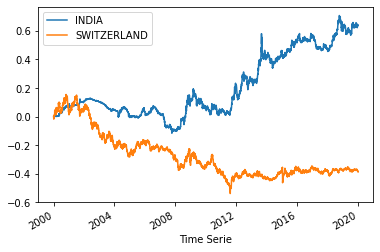

In [133]:
scaled_df[['INDIA', 'SWITZERLAND']].plot()

In [ ]:
means = normalized_df.mean()
# plt.scatter(df.columns, means)
# sns.swarmplot(y = means, x = df.columns)
# plt.xticks(rotation=90)
